In [5]:
import biolib
import matplotlib.pyplot as plt

In [6]:
with open("files/Vibrio cholerae Chromosome.fna","r") as f:
    dna = f.read().lower().replace('\n',"")

In [7]:
def find_ori(dna:str):
    res = [0]
    for i in dna:
        res.append(res[-1])
        if i == "c":
            res[-1]-=1
        elif i == "g":
            res[-1]+=1
        
    return res

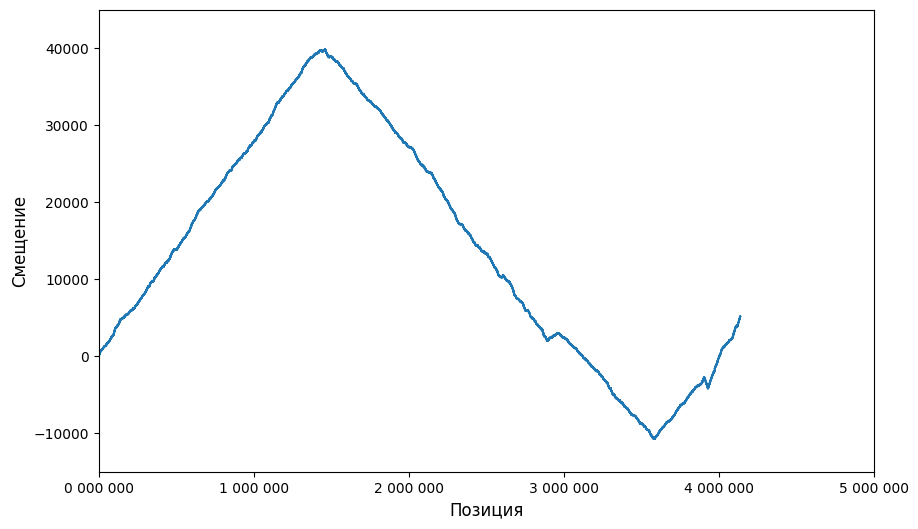

In [8]:
# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(10, 6))


# Устанавливаем подписи осей
ax.set_xlabel('Позиция', fontsize=12)
ax.set_ylabel('Смещение', fontsize=12)

# Устанавливаем пределы осей
ax.set_xlim(0, 5_000_000)
ax.set_ylim(-15000, 45000)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1_000_000):,}'.replace(',', ' ') + ' 000 000'))

plt.plot(list(range(len(dna)+1)),find_ori(dna))

In [9]:
positions = find_ori(dna)

In [10]:
approximate_position = positions.index(min(positions))

In [11]:
approximate_position

3581114

In [12]:
near_ori = dna[approximate_position:approximate_position+500]

In [13]:
from biolib.replication.frequent_words import frequent_words_with_mismatches_compliments

frequent_words_with_mismatches_compliments(near_ori,9,1)

(['tatttaaaa'], 5)